# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

## Data and Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Top 5 townships (twp) for 911 calls **

In [16]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Creating Column for Calling Reasons

**Title column value is e.g: EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **
    - need to split the reason out

In [6]:
def reason(title):
    title = title.split(":")[0]
    return title

In [7]:
df["reason"] = df["title"].apply(reason)

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** Most common Reason for a 911 call **

In [9]:
df["reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Create a countplot of 911 calls by Reason. **

In [21]:
import seaborn as sns
%matplotlib inline

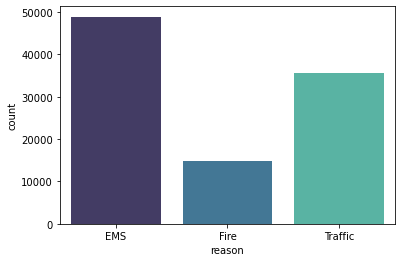

In [23]:
sns.countplot(x="reason", data=df, palette="mako")

___
** The timestamp column is now string, need to convert into datetime format **

In [10]:
type(df["timeStamp"].iloc[0])

str

In [11]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [12]:
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Create 3 new columns 
    -> Hour, Month, and Day of Week based off of the timeStamp column **

In [15]:
df["hour"] = df["timeStamp"].apply(lambda time: time.hour)
df["month"] = df["timeStamp"].apply(lambda time: time.month)
df["day of week"] = df["timeStamp"].apply(lambda time:time.weekday())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Day of Week is an integer 0-6. Need to map the actual string names to the day of the week **

In [16]:
# creating a dictionary in order to map the day with the number
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df["day of week"] = df["day of week"].map(day_map)

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Countplot of the Day of Week column with the hue based off of the Reason column. **

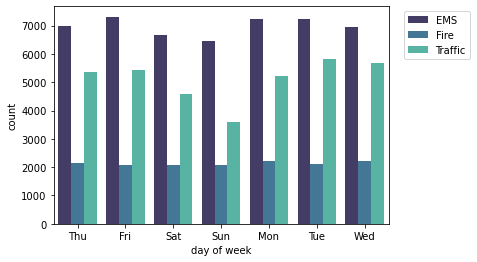

In [20]:
import seaborn as sns
sns.countplot(x="day of week", data=df, hue="reason", palette="mako")
plt.legend(bbox_to_anchor=(1.03, 1))

**Hue by Month:**

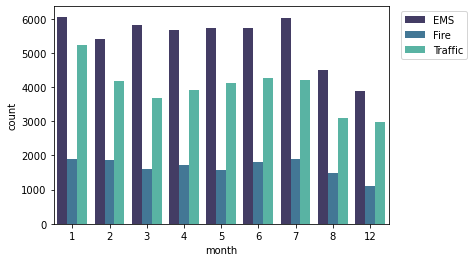

In [21]:
sns.countplot(x="month",data=df, hue="reason", palette="mako")
plt.legend(bbox_to_anchor=(1.25, 1))

** There are some missing Months in the plot, maybe we need to fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months **

In [112]:
df.groupby("month").count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time,hour,day of week
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


In [119]:
df1 = df.groupby("month").count()

In [123]:
df1["month"] = df1.index

In [194]:
df1

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time,hour,day of week,month
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,12


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

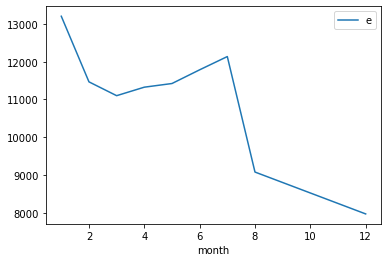

In [125]:
df1.plot.line(x="month", y="e")

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [23]:
df["date"] = df["timeStamp"].apply(lambda time: time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** group this Date column with the count() aggregate and create a plot of counts of 911 calls.**

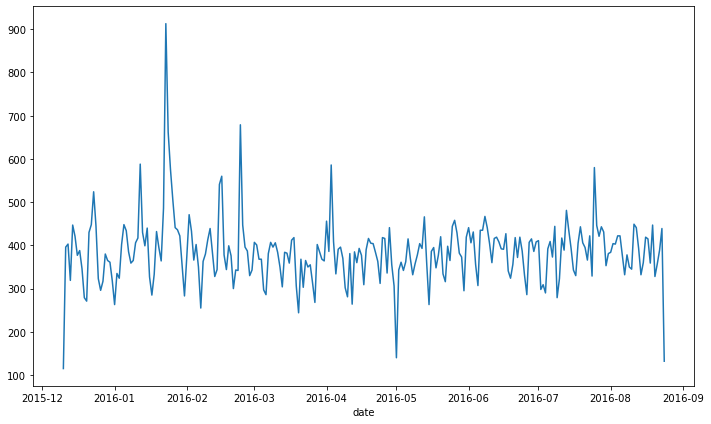

In [25]:
plt.figure(figsize=(10,6))
df.groupby("date").count()["e"].plot.line()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

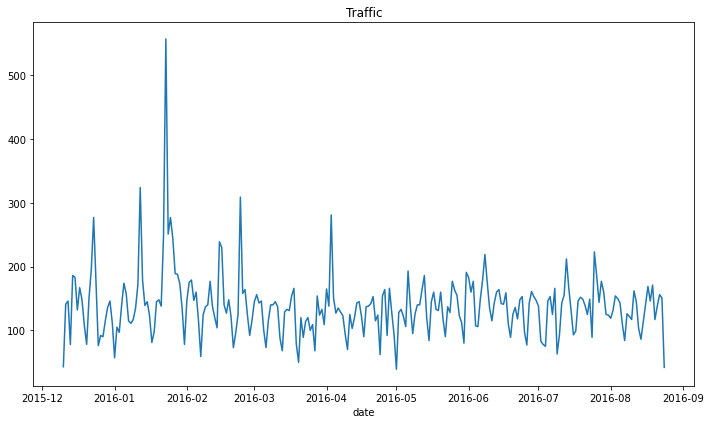

In [26]:
plt.figure(figsize=(10,6))
df[df["reason"]=="Traffic"].groupby("date").count()["e"].plot.line()
plt.title("Traffic")
plt.tight_layout()

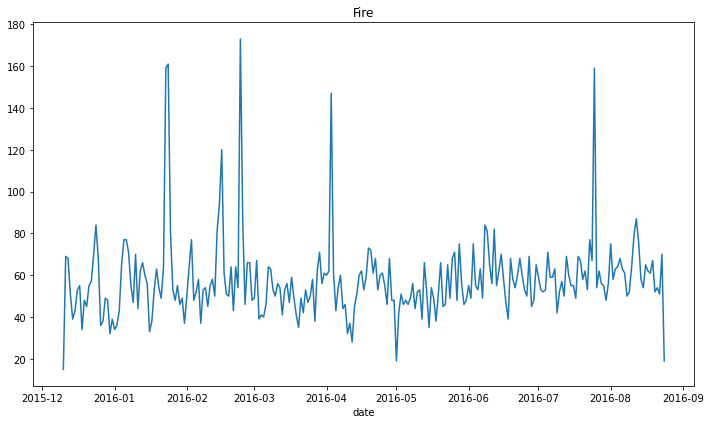

In [27]:
plt.figure(figsize=(10,6))
df[df["reason"]=="Fire"].groupby("date").count()["e"].plot.line()
plt.title("Fire")
plt.tight_layout()

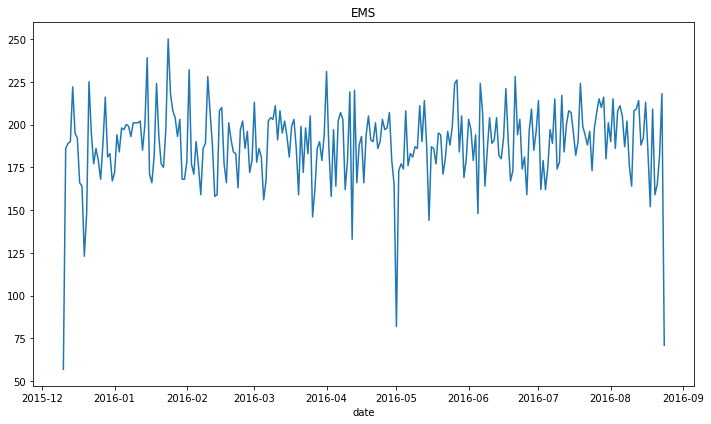

In [28]:
plt.figure(figsize=(10,6))
df[df["reason"]=="EMS"].groupby("date").count()["e"].plot.line()
plt.title("EMS")
plt.tight_layout()

____
** Creating heatmaps our data. 
We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [162]:
df3 = df.groupby(by=["hour", "day of week"]).count()
df3

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
hour day of week                                                          
0    Fri          275  275   275  248    275        275  275   275  275   
     Mon          282  282   282  243    282        282  282   282  282   
     Sat          375  375   375  324    375        375  373   371  375   
     Sun          383  383   383  336    383        383  383   381  383   
     Thu          278  278   278  251    278        278  278   278  278   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
23   Sat          467  467   467  402    467        467  467   464  467   
     Sun          330  330   330  283    330        330  330   330  330   
     Thu          354  354   354  307    354        354  354   354  354   
     Tue          274  274   274  245    274        274  274   273  274   
     Wed          335  335   335  294    335        335  334   335  335   

                  reason  time  month  date  
hour day of week                             
0    Fri             275   275    275   275  
     Mon             282   282    282   282  
     Sat             375   375    375   375  
     Sun             383   383    383   383  
     Thu             278   278    278   278  
...                  ...   ...    ...   ...  
23   Sat             467   467    467   467  
     Sun             330   330    330   330  
     Thu             354   354    354   354  
     Tue             274   274    274   274  
     Wed             335   335    335   335  

[168 rows x 13 columns]

In [166]:
df4 = df3.pivot_table(values="reason", index="day of week", columns="hour")

In [167]:
df4

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

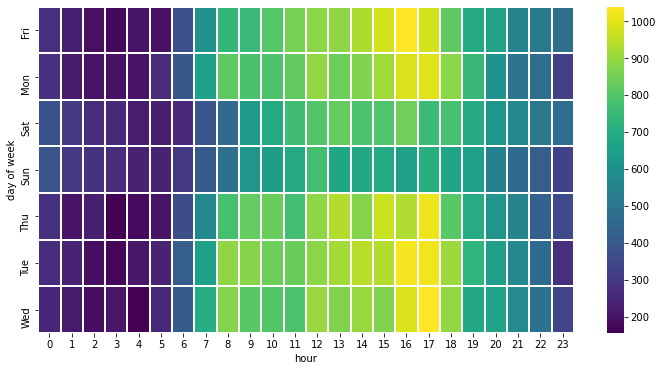

In [199]:
plt.figure(figsize=(12,6))
sns.heatmap(df4, cmap="viridis", linecolor="white", linewidths=1)

** Now create a clustermap using this DataFrame. **

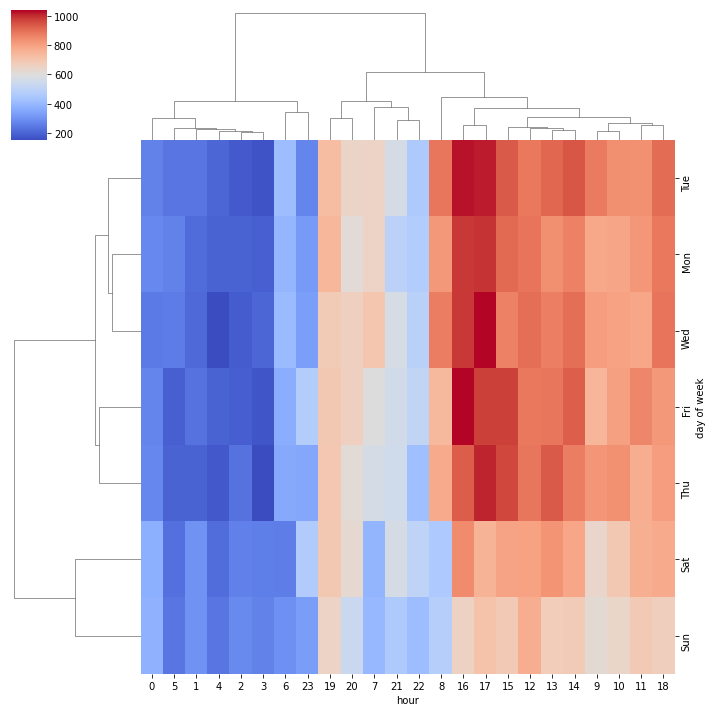

In [202]:
sns.clustermap(df4, cmap="coolwarm")

** Now create a DataFrame that shows the Month as the column. **

In [179]:
df5 = df.groupby(by=["month","day of week"]).count()
df6 = df5.pivot_table(values="e", index="day of week", columns="month")

In [180]:
df6

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


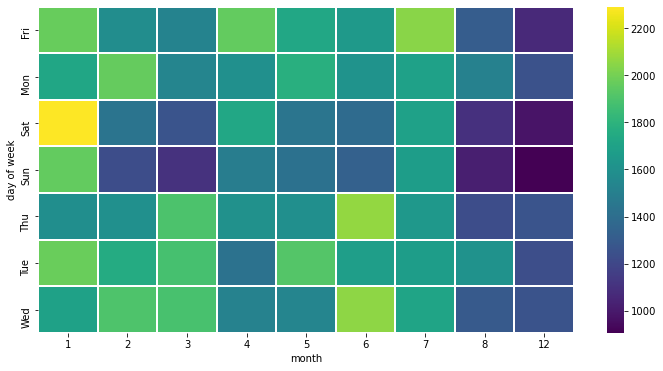

In [200]:
plt.figure(figsize=(12,6))
sns.heatmap(df6, cmap = "viridis", linecolor="white", linewidths=1)

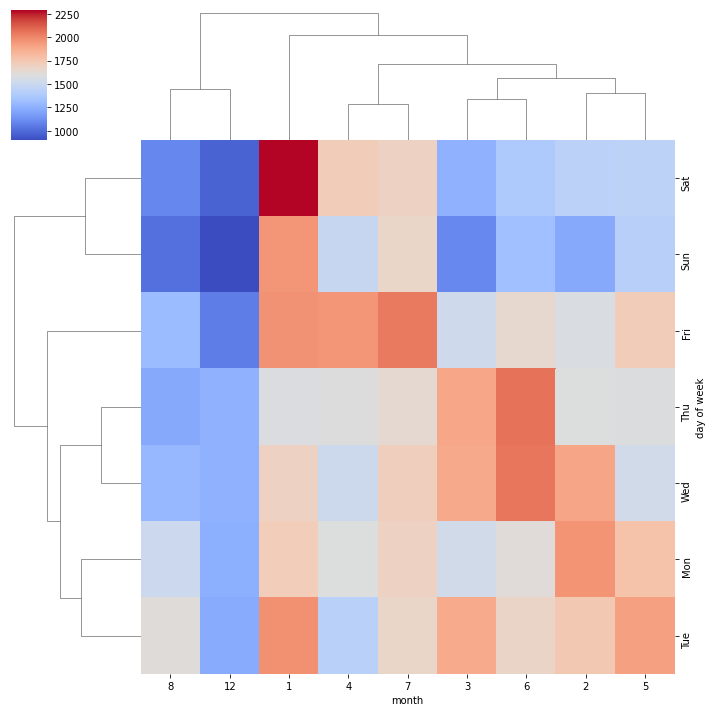

In [201]:
sns.clustermap(df6, cmap="coolwarm")